# 의류 이미지 인식(3/3) - 모델을 활용한 예측 

## 사용할 라이브러리 불러오기

In [1]:
import sys, os
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import pandas as pd
import collections

import matplotlib.pyplot as plt
%matplotlib inline

## 초기설정

In [7]:
# 테스트 이미지 목록 (1)
image_files = ["test.jpg",
               "test_.jpg",
               "test_2.jpg",
               "test_3.jpg",
               "test_4.jpg",
               "test1.jpg",
               "test2.jpg",               
               "test3.jpg",
               "test4.jpg",
               "test5.jpg",
               "test6.jpg"]
image_size = 64
nb_classes = len(image_files)


In [119]:
# 테스트 이미지 목록 (1)
image_files = ["test/sample_1_top.jpg",
               "test/sample_1_under.jpg",
               "test/sample_2_top.jpg",
               "test/sample_2_under.jpg",
               "test/sample_3_one.jpg",
               "test/sample_4_top.jpg",
               "test/sample_4_under.jpg",
               "test/sample_5_top.jpg",
               "test/sample_5_under.jpg",
               ]
image_size = 64
nb_classes = len(image_files)


In [133]:
# 테스트 이미지 목록 (1)
image_files = ["cut_test_AY.jpg"]
image_size = 64
nb_classes = len(image_files)


In [8]:
# 테스트 이미지 목록 (1)
image_files = ["img_cut_top.jpg",
               "img_cut_under.jpg"]
image_size = 64
nb_classes = len(image_files)


In [3]:
categories = ['long blouse_check','long blouse_none','long blouse_pattern','long dress_long sleeves',
              'long dress_short sleeves','long pants_jean','long pants_no jean','long shirt_check',
              'long shirt_none','long shirt_pattern','long skirt_A','long skirt_asymmetric',
              'long skirt_H','long sleeve_none','long sleeve_print','long sleeve_stripe',
              'mini dress_long sleeves','mini dress_short sleeves','short blouse_check','short blouse_none',
              'short blouse_pattern','short pants_jean','short pants_no jean','short shirt_check',
              'short shirt_none','short shirt_pattern','short skirt_A','short skirt_asymmetric',
              'short skirt_H','short sleeve_none','short sleeve_print','short sleeve_stripe',
              'sleeveless_none','sleeveless_print','sleeveless_stripe']

## 이미지 불러오기

In [8]:
X = []
files = []

for fname in image_files:
    img = Image.open(fname)
    img = img.convert("RGB")
#     img = img.convert("L")
    img = img.resize((image_size, image_size))
    in_data = np.asarray(img)
    in_data = in_data.astype("float") / 256
    X.append(in_data)
    files.append(fname)

X = np.array(X)

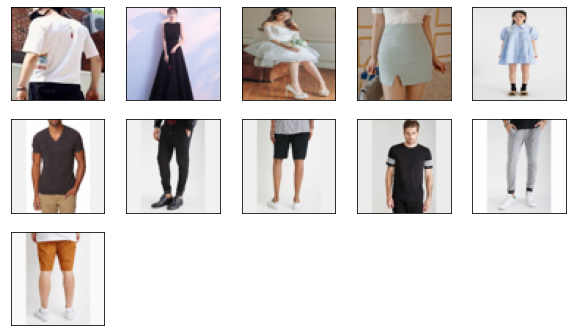

In [9]:
plt.figure(figsize=(10,10))

for i in range(len(X)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
plt.show()

## 모델 파일 읽어오기

In [12]:
model = load_model('./fashion/fashion_best_model.h5')

In [34]:
model = load_model('./fashion/민재,무현,정현 데이터/fashion_best_model_0.9966.h5')

## 예측 실행 

In [13]:
pre = model.predict(X)

InternalError:  dnn PoolForward launch failed
	 [[node model/max_pooling2d/MaxPool (defined at C:\Users\M\anaconda3\envs\CNN\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_8831]

Function call stack:
distributed_function


## 예측 결과 출력

In [13]:
for i, p in enumerate(pre):
    y = p.argmax()
    print("입력:", i,")", files[i])
    print("예측:", "[", y, "]", categories[y], "/ Score",p[y])
#     idxs = np.argsort(pre)[::-1][:2]
#     print(pre[i])
#     print(pre[i][y])
    print("")

입력: 0 ) img_cut_top.jpg
예측: [ 10 ] long_shirt / Score 0.99998116

입력: 1 ) img_cut_under.jpg
예측: [ 5 ] short / Score 0.9982023



## hard voting 방식

In [14]:
model_1 = load_model('./fashion/민재,무현,정현 데이터/fashion_best_model_0.9966.h5')
model_2 = load_model('./fashion/민재,무현,정현 데이터/fashion_best_model_0.9981.h5')
model_3 = load_model('./fashion/민재,무현,정현 데이터/fashion_best_model_0.9987.h5')

model_1 = np.argmax(model_1.predict(X),axis=1)
model_2 = np.argmax(model_2.predict(X),axis=1)
model_3 = np.argmax(model_3.predict(X),axis=1)

# #numpy array -> DF
# #numpy array -> Series -> DF
# test_emotion_bigXception=pd.Series(model_1,name="BigX")
# test_emotion_littleVGG16=pd.Series(model_2,name="VGG16")
# test_emotion_Xception=pd.Series(model_3,name="Xcep")

In [15]:
X_test_total = pd.DataFrame()
X_test_total["0.9966"] = model_1
X_test_total["0.9981"] = model_2
X_test_total["0.9987"] = model_3
X_test_total

,0.9966,0.9981,0.9987
0,10,10,10
1,5,5,5


In [16]:
def vote_func(x, best_model_idx=1):
  p = collections.Counter(x)
  if p.most_common()[0][1] >=2:
    return(p.most_common()[0][0])
  else:
    return(x[best_model_idx])
    

In [17]:
result = X_test_total.loc[:,:].apply(lambda x: vote_func(x), axis=1)
result

0    10
1     5
dtype: int64

In [18]:
for i, p in enumerate(result):
    print("입력:", i,")", files[i])
    print("예측:", "[", p, "]", categories[p])
    print("")

입력: 0 ) img_cut_top.jpg
예측: [ 10 ] long_shirt

입력: 1 ) img_cut_under.jpg
예측: [ 5 ] short

